# Úkol č. 4 - regrese
**Deadline úkolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
Body zadání, za jejichž (poctivé) vypracování získáte 12 bodů:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.).
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte tento Jupyter Notebook.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

rand_state = 42 # fix random seed

In [2]:
data = pd.read_csv('./LifeExpectancyData.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Zakladni analyza a upravy
Provedme zakaldni analyzu dat. Najdeme priznaky, ktere obsahuji chybejici hodnoty, pak zjistime datove typy jednotlicych sloupcu a rozhodneme pak o zakodovani priznaku a nakonec rozhodneme, jestli zbavime se nekterych priznaku. 

In [3]:
# missing values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
data.info(), data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(None,
 Country                             193
 Year                                 16
 Status                                2
 Life expectancy                     362
 Adult Mortality                     425
 infant deaths                       209
 Alcohol                            1076
 percentage expenditure             2328
 Hepatitis B                          87
 Measles                             958
  BMI                                608
 under-five deaths                   252
 Polio                                73
 Total expenditure                   818
 Diphtheria                           81
  HIV/AIDS                           200
 GDP                                2490
 Population                         2278
  thinness  1-19 years               200
  thinness 5-9 years                 207
 Income composition of resources     625
 Schooling                           173
 dtype: int64)

In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Co jsme zjistili:
* sloupce jsou spatne pojmenovany
* sloupec vysvetlovane promenne obsahuje 10 chybejicich hodnot
* dataset obsahuje pomerne hodne chybejicich hodnot
* jenom 2 priznky nejsou numericke - `Country` a `Status`, zakodujeme je pomoci one-hot encodingu. 
* Priznak `year` bych smazala, protoze neni objektivnim udajem popisujicim situaci v zemi i prestoze ocekavame, ze delka zivota casem bude stoupat, tomu tak byt nemusi.

In [6]:
# rename columns 
new_columns = ['country', 'year', 'status', 
               'life_expectancy', 'adult_mortality',
               'infant_deaths', 'alcohol', 
               'percentage_expenditure', 'hepatitis_b',
               'measles', 'bmi', 'under_five_deaths', 
               'polio', 'total_expenditure',
               'diphtheria', 'hiv', 'gdp', 'population',
               'thinness_1_19', 'thinness_5_9',
               'income_composition', 'schooling']

data.columns = new_columns

In [7]:
# delete rows with missing target variable
data_new = data.loc[data['life_expectancy'].notnull(), :]

assert data_new.shape[0] + 10 == data.shape[0]

data = data_new

In [9]:
# remove year feature
data = data.drop(columns=['year'])

In [11]:
# encode status feature
dummies = pd.get_dummies(data['status'])
# data = data.drop(columns='status')
data_cat = pd.concat([data, dummies], axis=1, ignore_index=True)
data_cat.columns = list(data.columns) + [i.lower()for i in dummies.columns]
data_cat = data_cat.drop(columns='status')
data = data_cat

In [12]:
# probably delete later

dummies = pd.get_dummies(data['country'], prefix='country')
# data = data.drop(columns='status')
data_cat = pd.concat([data, dummies], axis=1, ignore_index=True)
data_cat.columns = list(data.columns) + [i.lower()for i in dummies.columns]
data_cat = data_cat.drop(columns='country')
data = data_cat
data

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,country_united republic of tanzania,country_united states of america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela (bolivarian republic of),country_viet nam,country_yemen,country_zambia,country_zimbabwe
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,1
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,1
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,1
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,0,1


Validacni mnozinu, podle me, nepoterbujeme, protoze bude automaticky vytvorena v ramci `GridSearchCV`. 

In [13]:
X = data.drop(columns='life_expectancy')
y = data['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

### Chybejici hodnoty

Doplnenei chybejicich hodnot medianem v tomto datasetu nebude davat smysl, kvuli obrovskemu rozdilu v zivotni urovni u ruznych zemi. Zkusime doplnit chybejici hodnoty na zaklade shody s jinymi staty, tedy pouzijeme `KNNImputer`.

In [14]:
print('Pomer chybejicich hodnot:')
data.isnull().sum().apply(lambda x: str(x / data.shape[0] * 100) + " %")

Pomer chybejicich hodnot:


life_expectancy                                             0.0 %
adult_mortality                                             0.0 %
infant_deaths                                               0.0 %
alcohol                                       6.591530054644809 %
percentage_expenditure                                      0.0 %
                                                     ...         
country_venezuela (bolivarian republic of)                  0.0 %
country_viet nam                                            0.0 %
country_yemen                                               0.0 %
country_zambia                                              0.0 %
country_zimbabwe                                            0.0 %
Length: 204, dtype: object

Poznamka k puvodnimu odevzdani:

Nafitovala jsem Imputer na Trenovacich datech a pak jsem transformovala testovaci sadu.

In [15]:
knn_imp = KNNImputer(n_neighbors=7)

x_train_imp_val = knn_imp.fit_transform(X_train)
X_train_imp = pd.DataFrame(x_train_imp_val, columns=X_train.columns, index=X_train.index)

x_test_imp_val = knn_imp.transform(X_test)
X_test_imp = pd.DataFrame(x_test_imp_val, columns=X_test.columns, index=X_test.index)

In [16]:
X_train_imp

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,...,country_united republic of tanzania,country_united states of america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela (bolivarian republic of),country_viet nam,country_yemen,country_zambia,country_zimbabwe
2268,126.0,1.0,9.380000,742.510971,97.000000,0.0,58.3,1.0,93.0,9.890000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,179.0,0.0,4.140000,369.631710,88.000000,0.0,26.4,0.0,88.0,4.240000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,376.0,92.0,3.440000,0.000000,86.000000,3413.0,19.6,138.0,89.0,4.210000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2512,62.0,0.0,6.900000,8105.590882,96.714286,25.0,56.5,0.0,98.0,9.230000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,275.0,4.0,2.311429,0.000000,87.000000,153.0,26.3,6.0,87.0,3.782857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,63.0,0.0,7.380000,335.518057,86.000000,1.0,67.1,0.0,73.0,8.330000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,297.0,5.0,2.640000,28.301911,89.428571,12.0,21.9,7.0,77.0,6.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,29.0,17.0,5.570000,38.109043,73.285714,0.0,38.5,24.0,6.0,4.410000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296,75.0,2.0,9.690000,3.122230,95.000000,0.0,55.7,3.0,96.0,8.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Predikce 
zkusime nafitovat model `LinearRegression` a `Ridge` na doplnenych datech

In [17]:
def do_regression(*args, alpha=0.02, print_res=True):
    X_train, X_test, y_train, y_test = args
    lr_preds = LinearRegression().fit(X_train, y_train).predict(X_test)
    rr_preds = Ridge(alpha=alpha).fit(X_train, y_train).predict(X_test)
    if print_res:
        print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_preds):.6}\nRidge Regression MAE: {mean_absolute_error(y_test, rr_preds):.6}")
    return mean_absolute_error(y_test, lr_preds)

In [18]:
_ = do_regression(X_train_imp, X_test_imp, y_train, y_test)

Linear Regression MAE: 1.48691
Ridge Regression MAE: 1.48565


Ted zkusime experimentovat se Skalovanim a Vytvarenim novych priznaku

### Presklaovani 
Nesmime zapamatovat na to, ze vetsina skalovacich metod neni rezistentni k odlehlym hodnotam. 

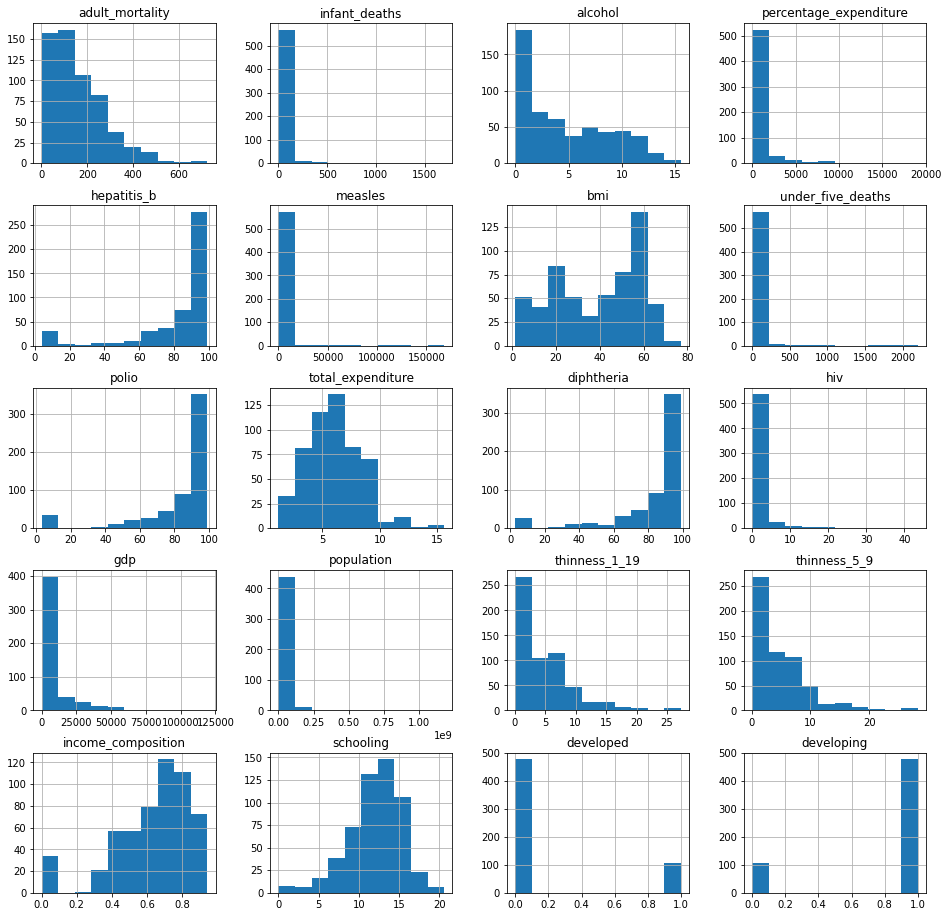

In [19]:
X_test.iloc[:, :20].hist(figsize=(16, 16));

Vetsina priznaku maji exponencialni nebo log-exponencialni rozdeleni, a tedy obsahuji odlehle hodnoty. Zkusime aplikovat standartizaci a min-max noramlizaci, ale ocekavame, ze moc nepomuzou. Zkusime pak `RobustScaler` ktery je rezistentni k outlierum

In [20]:
X_train_s = X_train_imp.copy() 
X_test_s = X_test_imp.copy()

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train_s)
X_test_s = ss.transform(X_test_s)

_ = do_regression(X_train_s, X_test_s, y_train, y_test)

Linear Regression MAE: 1.48673
Ridge Regression MAE: 1.48569


In [21]:
X_train_m = X_train_imp.copy() 
X_test_m = X_test_imp.copy()

mms = MinMaxScaler()
X_train_m = mms.fit_transform(X_train_m)
X_test_s = mms.transform(X_test_m)

_ = do_regression(X_train_m, X_test_m, y_train, y_test)

Linear Regression MAE: 2.88804e+07
Ridge Regression MAE: 1.05825e+06


In [22]:
X_train_r = X_train_imp.copy() 
X_test_r = X_test_imp.copy()

rs = RobustScaler()
X_train_r = rs.fit_transform(X_train_r)
X_test_r = rs.transform(X_test_r)

_ = do_regression(X_train_r, X_test_r, y_train, y_test)

Linear Regression MAE: 1.48666
Ridge Regression MAE: 1.48562


Vidime, ze sklaovani nam moc nepomaha, min-max normalizace dokonce situaci zhorsilo prave kvuli outlierum. Slo by treba aplikovat box-cox transformaci na jednotlive priznaky a pote zkusit presklaovat, ale tim se zbyvat nebudeme.

Update: zjistila jsem, ze `LinearRegression` defaultne normalizuje data, proto vysledky po normalizaci se neliseji


### PCA
Zkusime aplikovat metodu PCA na nase data

In [23]:
from sklearn.decomposition import PCA

In [24]:
def do_regression_with_PCA(n_comp=50, std=False):
    pca = PCA(n_components=n_comp, random_state=42)
    X_tr_pc = pca.fit_transform(X_train_imp)
    X_test_pc = pca.transform(X_test_imp)
    return do_regression(X_tr_pc, X_test_pc, y_train, y_test, print_res=False)

pca_res = {}
for n in range(3, len(X_train.columns)):
    pca_res[n] = do_regression_with_PCA(n)   

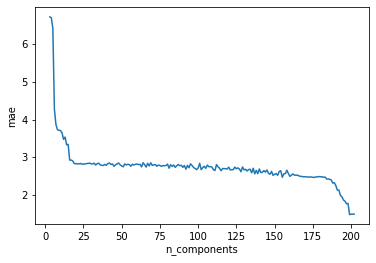

In [25]:
plt.plot(pca_res.keys(), pca_res.values())
plt.xlabel('n_components')
plt.ylabel('mae')
plt.show()

In [26]:
sorted(pca_res.items(), key=lambda x: x[1])[:10]

[(199, 1.4772926522152559),
 (200, 1.4866640283319426),
 (201, 1.4870319114184536),
 (202, 1.4870319120055795),
 (197, 1.7645886351478928),
 (198, 1.770045266509437),
 (196, 1.8302780437839261),
 (195, 1.8629130514809347),
 (194, 1.9463835546138424),
 (193, 1.986175845496854)]

Pouzitim PCA(199 komponent) jsme snizili MAE

### Cross validace
Provedme cross validaci na nekolika modelech (vcetne `LinearRegression` and `Ridge`). Nebudeme pouzivat `KNNRegression` kvuli vysoke dimenzionalite dat. Ziskame tim nejlepsi pararmetry modelu a zkusime i jine modely, nez `LinearRegression` and `Ridge`. Na trenovani a testovani pouzijme data preskalovana pomoci `RobustScaleru`

In [27]:
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    LinearRegression(),
    Ridge()
]

grid = {
    'DecisionTreeRegressor': {
        'max_depth': range(2, 20)
    },
    'RandomForestRegressor': {
        'n_estimators': range(20, 120, 5),
        'max_depth': range(5, 15)
    },
    'AdaBoostRegressor': {
        'n_estimators': range(20, 120, 5),
        'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
    },
    'LinearRegression': {
        'normalize': [True, False],
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
        'normalize': [True, False],
        'fit_intercept': [True, False]
    }
}

scores = {}
for model in models:
    search = GridSearchCV(estimator=model, 
                          param_grid=grid[model.__class__.__name__],
                          scoring='neg_mean_absolute_error',
                          cv=5)
    search.fit(X_train_r, y_train)  # train model on scaled data via RobustScaler
    scores[search.best_score_] = search
scores

{-1.645774133509376: GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': range(2, 20)},
              scoring='neg_mean_absolute_error'),
 -1.2472603897286607: GridSearchCV(cv=5, estimator=RandomForestRegressor(),
              param_grid={'max_depth': range(5, 15),
                          'n_estimators': range(20, 120, 5)},
              scoring='neg_mean_absolute_error'),
 -2.3906336936611163: GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
              param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
                                            1, 3],
                          'n_estimators': range(20, 120, 5)},
              scoring='neg_mean_absolute_error'),
 -1.465065148133549: GridSearchCV(cv=5, estimator=LinearRegression(),
              param_grid={'fit_intercept': [True, False],
                          'normalize': [True, False]},
              scoring='neg_mean_absolute_error'),
 -1.4600144807164128: GridSearch

In [28]:
test_mae = []
for model in scores.values():
    best = model.best_estimator_
    y_pred_test = best.predict(X_test_r)
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    print(f'MAE {best.__class__.__name__} = {test_mae[-1]:.3}')

MAE DecisionTreeRegressor = 1.45
MAE RandomForestRegressor = 1.1
MAE AdaBoostRegressor = 2.35
MAE LinearRegression = 1.49
MAE Ridge = 1.48


Nejlepsi testovaci MAE ma `RandomForestRegressor`. Metriky linearni a hrebenove regresi se nezmenily. Koukneme na naucene modely   

In [29]:
cvs = list(scores.values())
cvs[1].best_estimator_, cvs[4].best_estimator_

(RandomForestRegressor(max_depth=14), Ridge(alpha=0.1))

In [30]:
feat_imp = [(col, w) for col, w in zip(X_test_imp.columns, cvs[1].best_estimator_.feature_importances_)]
sorted(feat_imp, key=lambda x: x[1], reverse=True)[:10] 

[('hiv', 0.5240256972438495),
 ('income_composition', 0.25361064708661746),
 ('adult_mortality', 0.11960822021422012),
 ('bmi', 0.014765777214514596),
 ('schooling', 0.012645206732901345),
 ('alcohol', 0.009339531070787017),
 ('thinness_5_9', 0.008970167118499382),
 ('under_five_deaths', 0.007754416703440892),
 ('infant_deaths', 0.0049742552521718),
 ('thinness_1_19', 0.004575338381069741)]

### Zaver
* Model Linearni regresi je rezistentni k vysoke dimenzionalite v datech
* Pouzili jsme imputaci KNN a dosahli jsme docela dobrych vysledku, s prihlednutim k poctu chybejicich hodnot. 
* implementace linearni regresi v sklearn defaultne normalizue data pred ucenim a proto preskalovani nam vysledky nezmenilo.
* Nejmensi testovaci chyby jsme dosahli modelem `RandomForestRegression` s parametry `max_depth=14, n_estimators=105`
* Nejmensi chyby na modelu `Ridge` jsme doshli pri `learning_rate=0.1`
* Nejmensi chyby na modelu `LinearRegression` jsme dosahli pouzitim PCA (199 hlavnich komponent)
* Podle modelu `RandomForestRegression`, priznaki s nejvetsim vlivem na ocekavanou delku zivota jsou `hiv`, `income_composition`, `adult_mortality`